<a href="https://colab.research.google.com/github/skaty5678/Nairobi_transport_prediction/blob/main/transport_demand_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#!unzip "/content/drive/MyDrive/Nairobi Transport Data.zip" -d "/content/drive/MyDrive/"

In [3]:
import pandas as pd
import numpy as np

In [4]:
raw_df = pd.read_csv('/content/drive/MyDrive/train_revised.csv')

In [5]:
raw_df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [6]:
raw_df.shape

(51645, 10)

In [7]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


In [8]:
raw_df['max_capacity'].value_counts()

49    31985
11    19660
Name: max_capacity, dtype: int64

In [9]:
raw_df.describe(include='object')

,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type
count,51645,51645,51645,51645,51645,51645,51645,51645
unique,61,2,51645,149,78,17,1,2
top,1,Mpesa,UZUEHCBUSO,10-12-17,7:09,Kisii,Nairobi,Bus
freq,2065,51532,1,856,3926,22607,51645,31985


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
raw_df.isna().sum()

ride_id            0
seat_number        0
payment_method     0
payment_receipt    0
travel_date        0
travel_time        0
travel_from        0
travel_to          0
car_type           0
max_capacity       0
dtype: int64

In [12]:
raw_df['ride_id'].nunique()

6249

In [13]:
import warnings
warnings.filterwarnings('ignore')

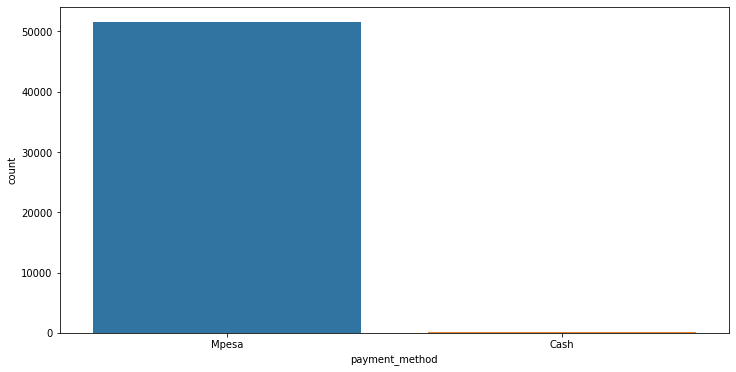

In [14]:
plt.figure(figsize=(12,6))
sns.countplot(raw_df['payment_method'])
plt.show()

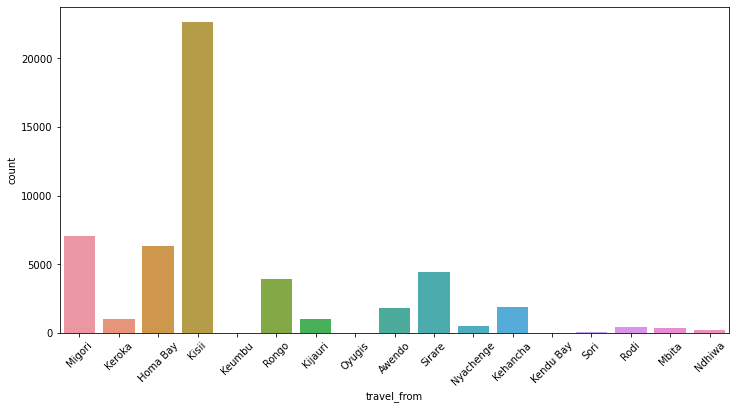

In [15]:
plt.figure(figsize=(12,6))
sns.countplot(raw_df['travel_from'])
plt.xticks(rotation=45)
plt.show()

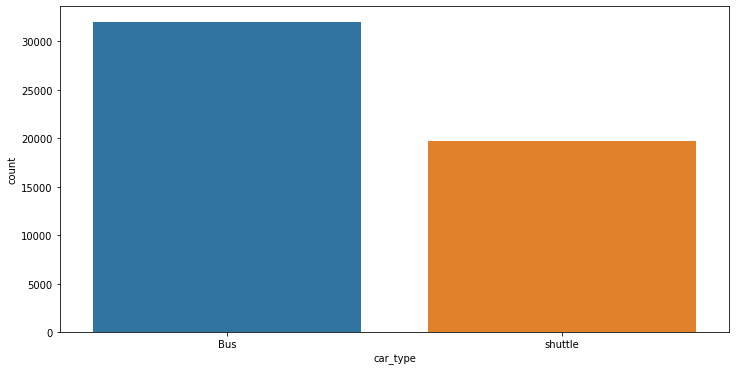

In [16]:
plt.figure(figsize=(12,6))
sns.countplot(raw_df['car_type'])
plt.show()

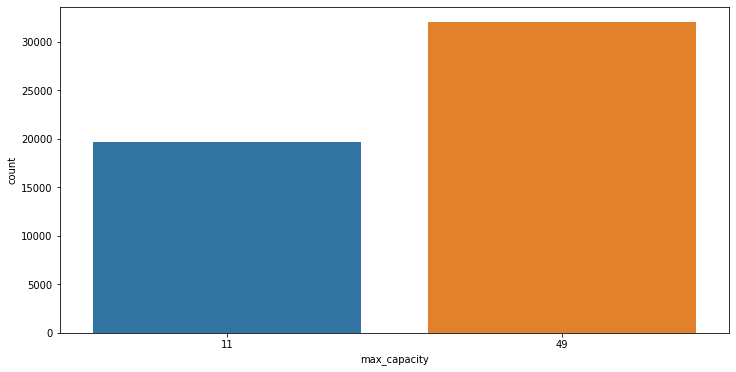

In [17]:
plt.figure(figsize=(12,6))
sns.countplot(raw_df['max_capacity'])
plt.show()

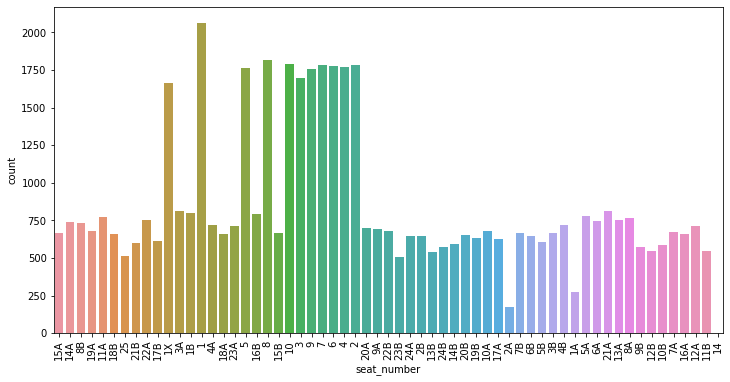

In [18]:
plt.figure(figsize=(12,6))
sns.countplot(raw_df['seat_number'])
plt.xticks(rotation=90)
plt.show()

In [19]:
pro_df = raw_df.copy()

In [20]:
new_df = pd.to_datetime(pro_df.travel_date.astype(str) + ' ' +pro_df.travel_time.astype(str))
pro_df.insert(2, 'travel_datetime', new_df)


In [21]:
pro_df.head()

,ride_id,seat_number,travel_datetime,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,2017-10-17 07:15:00,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,2017-11-19 07:12:00,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,2017-11-26 07:05:00,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,2017-11-27 07:10:00,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,2017-11-27 07:12:00,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [22]:
ticket_info = pro_df.groupby(['ride_id']).seat_number.count()

In [23]:
ticket_info = ticket_info.rename('no_of_tickets').reset_index()

In [24]:
ticket_info.head()

,ride_id,no_of_tickets
0,1442,1
1,5437,1
2,5710,1
3,5777,5
4,5778,31


In [25]:
pro_df.drop_duplicates('ride_id',inplace = True)

In [26]:
pro_df = pro_df.merge(ticket_info,how = 'left', on = 'ride_id')

In [27]:
pro_df.drop(columns = ['seat_number','payment_method','payment_receipt','travel_date','travel_time','travel_to'],inplace=True)

In [28]:
pro_df.head()

,ride_id,travel_datetime,travel_from,car_type,max_capacity,no_of_tickets
0,1442,2017-10-17 07:15:00,Migori,Bus,49,1
1,5437,2017-11-19 07:12:00,Migori,Bus,49,1
2,5710,2017-11-26 07:05:00,Keroka,Bus,49,1
3,5777,2017-11-27 07:10:00,Homa Bay,Bus,49,5
4,5778,2017-11-27 07:12:00,Migori,Bus,49,31


In [29]:
pro_df.shape

(6249, 6)

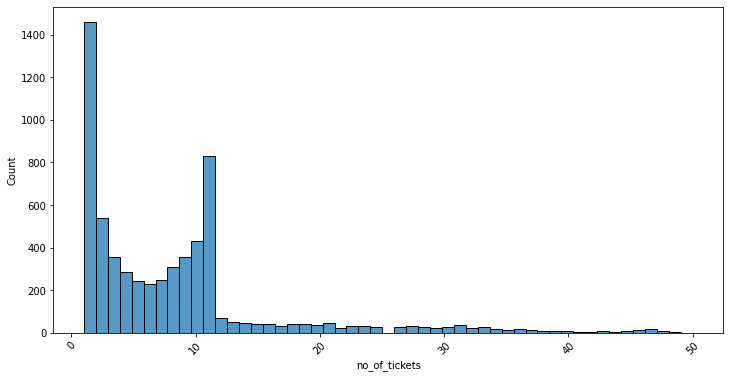

In [30]:
plt.figure(figsize=(12,6))
sns.histplot(pro_df['no_of_tickets'])
plt.xticks(rotation=45)
plt.show()

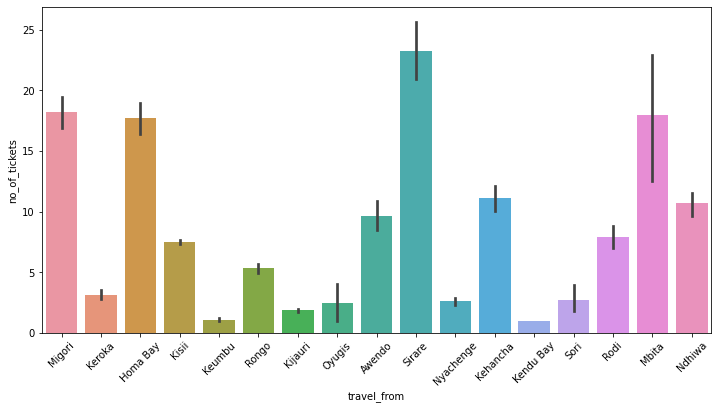

In [31]:
plt.figure(figsize=(12,6))
sns.barplot(x='travel_from', y='no_of_tickets', data=pro_df)
plt.xticks(rotation=45)
plt.show()

In [52]:
ex_df = pro_df.copy()

In [53]:
ex_df['travel_year'] = ex_df['travel_datetime'].dt.year
ex_df['travel_month'] = ex_df['travel_datetime'].dt.month
ex_df['travel_hour'] = ex_df['travel_datetime'].dt.hour
ex_df['travel_dayofweek'] = ex_df['travel_datetime'].dt.dayofweek
ex_df['travel_quarterofyear'] = ex_df['travel_datetime'].dt.quarter


In [54]:
ex_df['travel_dayofmonth'] = ex_df['travel_datetime'].dt.day

In [55]:
ex_df.head()

,ride_id,travel_datetime,travel_from,car_type,max_capacity,no_of_tickets,travel_year,travel_month,travel_hour,travel_dayofweek,travel_quarterofyear,travel_dayofmonth
0,1442,2017-10-17 07:15:00,Migori,Bus,49,1,2017,10,7,1,4,17
1,5437,2017-11-19 07:12:00,Migori,Bus,49,1,2017,11,7,6,4,19
2,5710,2017-11-26 07:05:00,Keroka,Bus,49,1,2017,11,7,6,4,26
3,5777,2017-11-27 07:10:00,Homa Bay,Bus,49,5,2017,11,7,0,4,27
4,5778,2017-11-27 07:12:00,Migori,Bus,49,31,2017,11,7,0,4,27


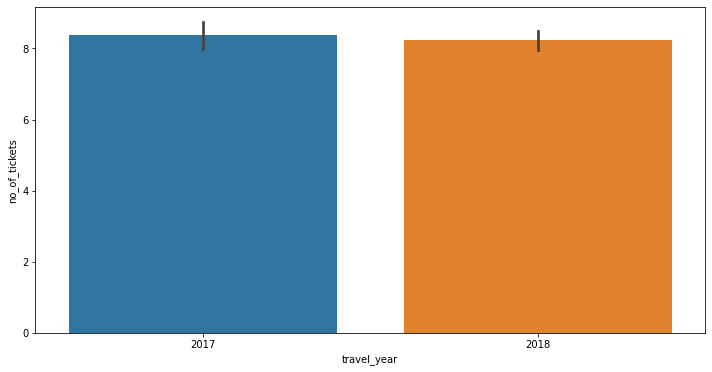

In [56]:
plt.figure(figsize=(12,6))
sns.barplot(x='travel_year', y='no_of_tickets', data=ex_df)
plt.show()

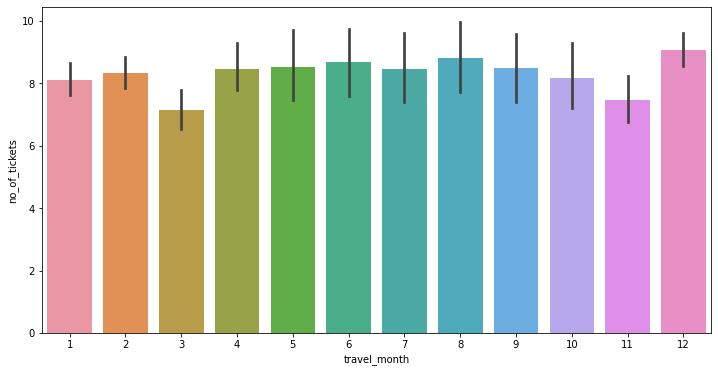

In [57]:
plt.figure(figsize=(12,6))
sns.barplot(x='travel_month', y='no_of_tickets', data=ex_df)
plt.show()

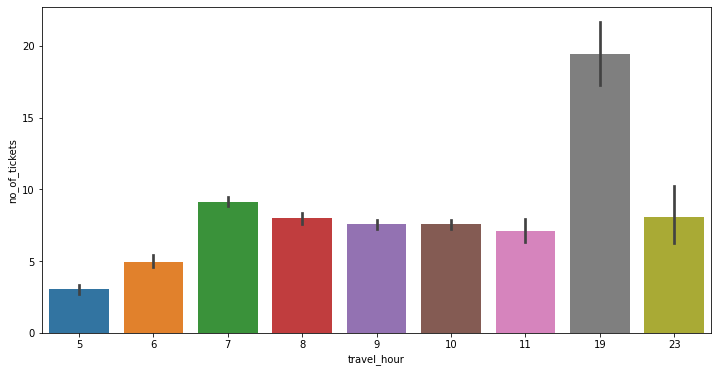

In [58]:
plt.figure(figsize=(12,6))
sns.barplot(x='travel_hour', y='no_of_tickets', data=ex_df)
plt.show()

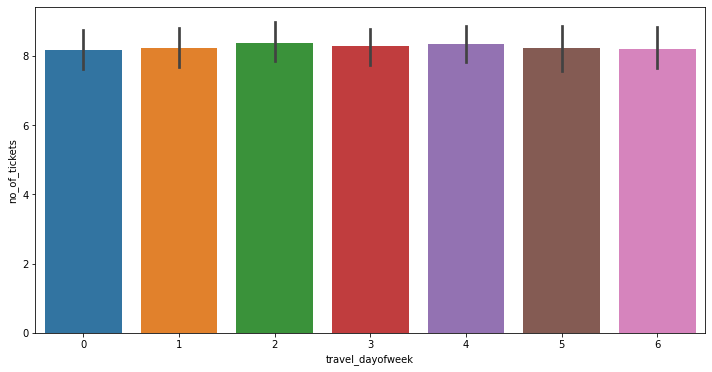

In [59]:
plt.figure(figsize=(12,6))
sns.barplot(x='travel_dayofweek', y='no_of_tickets', data=ex_df)
plt.show()

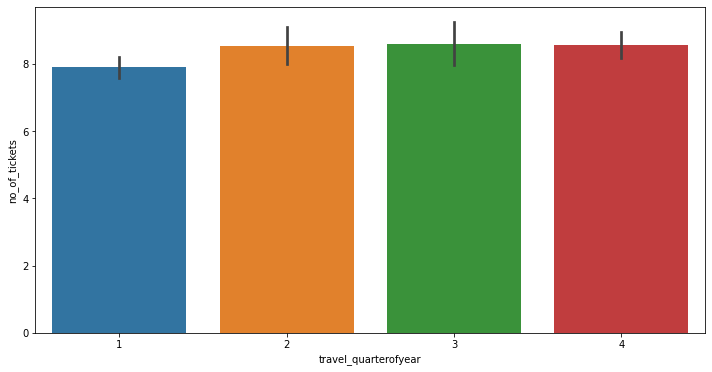

In [60]:
plt.figure(figsize=(12,6))
sns.barplot(x='travel_quarterofyear', y='no_of_tickets', data=ex_df)
plt.show()

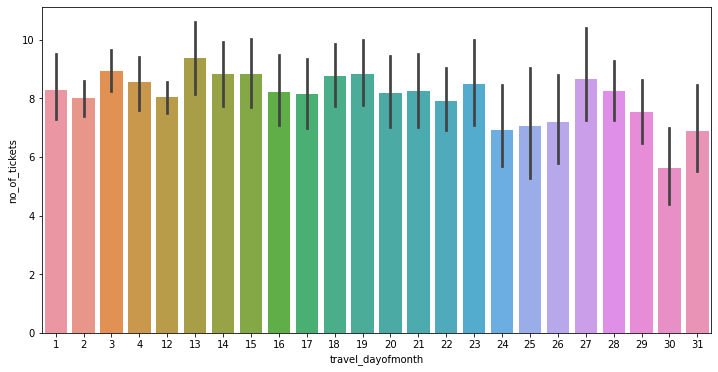

In [61]:
plt.figure(figsize=(12,6))
sns.barplot(x='travel_dayofmonth', y='no_of_tickets', data=ex_df)
plt.show()